In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.mixture import GaussianMixture

%config InlineBackend.figure_format = 'png'
%config InlineBackend.rc = {'figure.figsize': (12, 12), 'savefig.dpi': 300, 'figure.autolayout': True}

In [2]:
train_df = pd.read_csv('../Data/train_10_calasses.csv')
train_df.head()

,1st_principal,2nd_principal,label
0,1011.718666,-294.857933,0.0
1,1037.650581,-354.925264,0.0
2,610.291239,-239.776467,0.0
3,933.878065,-243.292906,0.0
4,1663.961351,-90.815563,0.0


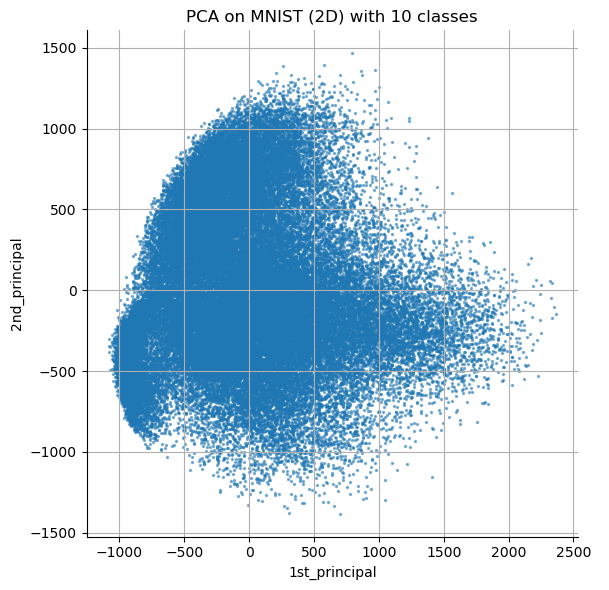

In [3]:
sns.FacetGrid(train_df, height=6).map(plt.scatter, '1st_principal', '2nd_principal', s=2, alpha=0.5).add_legend()
plt.title('PCA on MNIST (2D) with 10 classes')
plt.grid()
plt.show()

In [4]:
selected_train_df = pd.read_csv('../Data/train_3_calasses.csv')
selected_train_df.head()

,1st_principal,2nd_principal,label
0,-383.501498,-18.825309,5.0
1,-122.315822,-649.597358,5.0
2,-348.289293,-692.391550,5.0
3,-652.952302,-656.562123,5.0
4,-224.849709,-642.848015,5.0


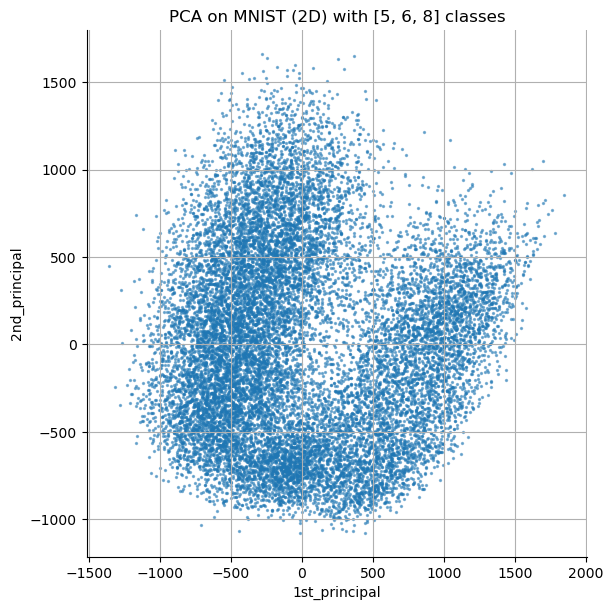

In [14]:
sns.FacetGrid(selected_train_df, height=6).map(plt.scatter, '1st_principal', '2nd_principal', s=2, alpha=0.5).add_legend()
plt.title(f'PCA on MNIST (2D) with [5, 6, 8] classes')
plt.grid()
plt.show()

In [6]:
gm = GaussianMixture(n_components=3)

gm.fit(selected_train_df[['1st_principal', '2nd_principal']])

y_pred = gm.predict(selected_train_df[['1st_principal', '2nd_principal']])

In [7]:
predicted_df = selected_train_df.copy()
predicted_df['label'] = y_pred

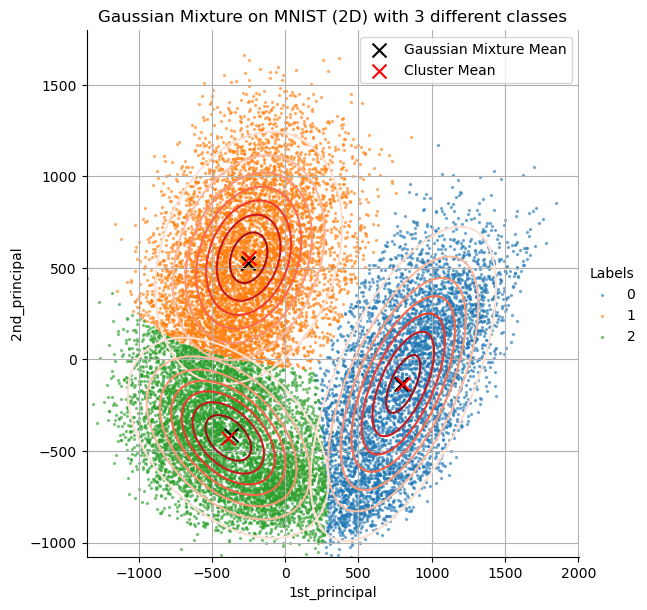

In [13]:
df = predicted_df

X = df[['1st_principal', '2nd_principal']].values
Y = df['label'].values

sns.FacetGrid(df, hue='label', height=6).map(plt.scatter, '1st_principal', '2nd_principal', s=2, alpha=0.5).add_legend(title='Labels')

x_gm = plt.scatter(gm.means_[:, 0], gm.means_[:, 1], marker='x', s=100, c='black')

[x_min, y_min] = np.min(X, axis=0)
[x_max, y_max] = np.max(X, axis=0)
x, y = np.mgrid[x_min:x_max:10, y_min:y_max:10]
pos = np.dstack((x, y))

classes = np.unique(Y)
for c in classes:
    X_c = X_c = X[Y == c]
    pdf = sp.stats.multivariate_normal(mean=np.mean(X_c, axis=0), cov=np.cov(X_c.T)).pdf(pos)
    plt.contour(x, y, pdf, alpha=1, cmap='Reds')
    
    x_cluster = plt.scatter(np.mean(X_c, axis=0)[0], np.mean(X_c, axis=0)[1], marker='x', s=100, c='red')

plt.legend([x_gm, x_cluster], ['Gaussian Mixture Mean', 'Cluster Mean'])

plt.title(f'Gaussian Mixture on MNIST (2D) with 3 different classes')
plt.grid()
plt.show()

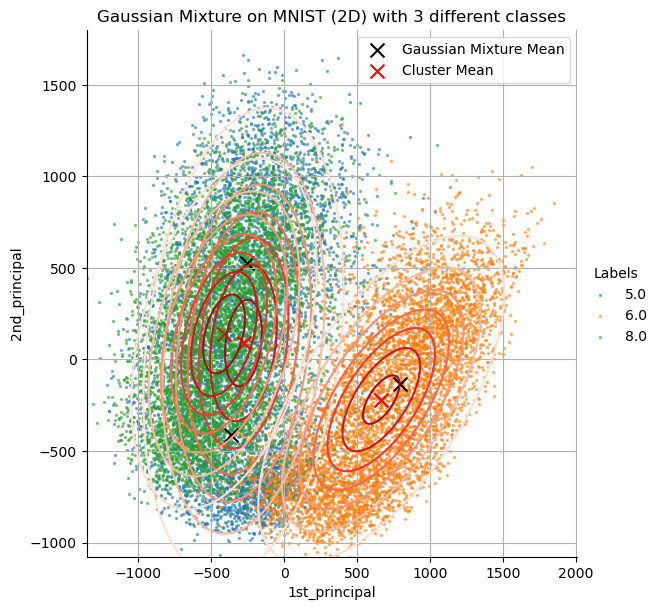

In [15]:
df = selected_train_df

X = df[['1st_principal', '2nd_principal']].values
Y = df['label'].values

sns.FacetGrid(df, hue='label', height=6).map(plt.scatter, '1st_principal', '2nd_principal', s=2, alpha=0.5).add_legend(title='Labels')

x_gm = plt.scatter(gm.means_[:, 0], gm.means_[:, 1], marker='x', s=100, c='black')

[x_min, y_min] = np.min(X, axis=0)
[x_max, y_max] = np.max(X, axis=0)
x, y = np.mgrid[x_min:x_max:10, y_min:y_max:10]
pos = np.dstack((x, y))

classes = np.unique(Y)
for c in classes:
    X_c = X_c = X[Y == c]
    pdf = sp.stats.multivariate_normal(mean=np.mean(X_c, axis=0), cov=np.cov(X_c.T)).pdf(pos)
    plt.contour(x, y, pdf, alpha=1, cmap='Reds')
    
    x_cluster = plt.scatter(np.mean(X_c, axis=0)[0], np.mean(X_c, axis=0)[1], marker='x', s=100, c='red')

plt.legend([x_gm, x_cluster], ['Gaussian Mixture Mean', 'Cluster Mean'])

plt.title(f'Gaussian Mixture on MNIST (2D) with 3 different classes')
plt.grid()
plt.show()